In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import time as time
from matplotlib import rc

In [2]:
rcParams['savefig.dpi'] = 200
rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'Lucida Bright'
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


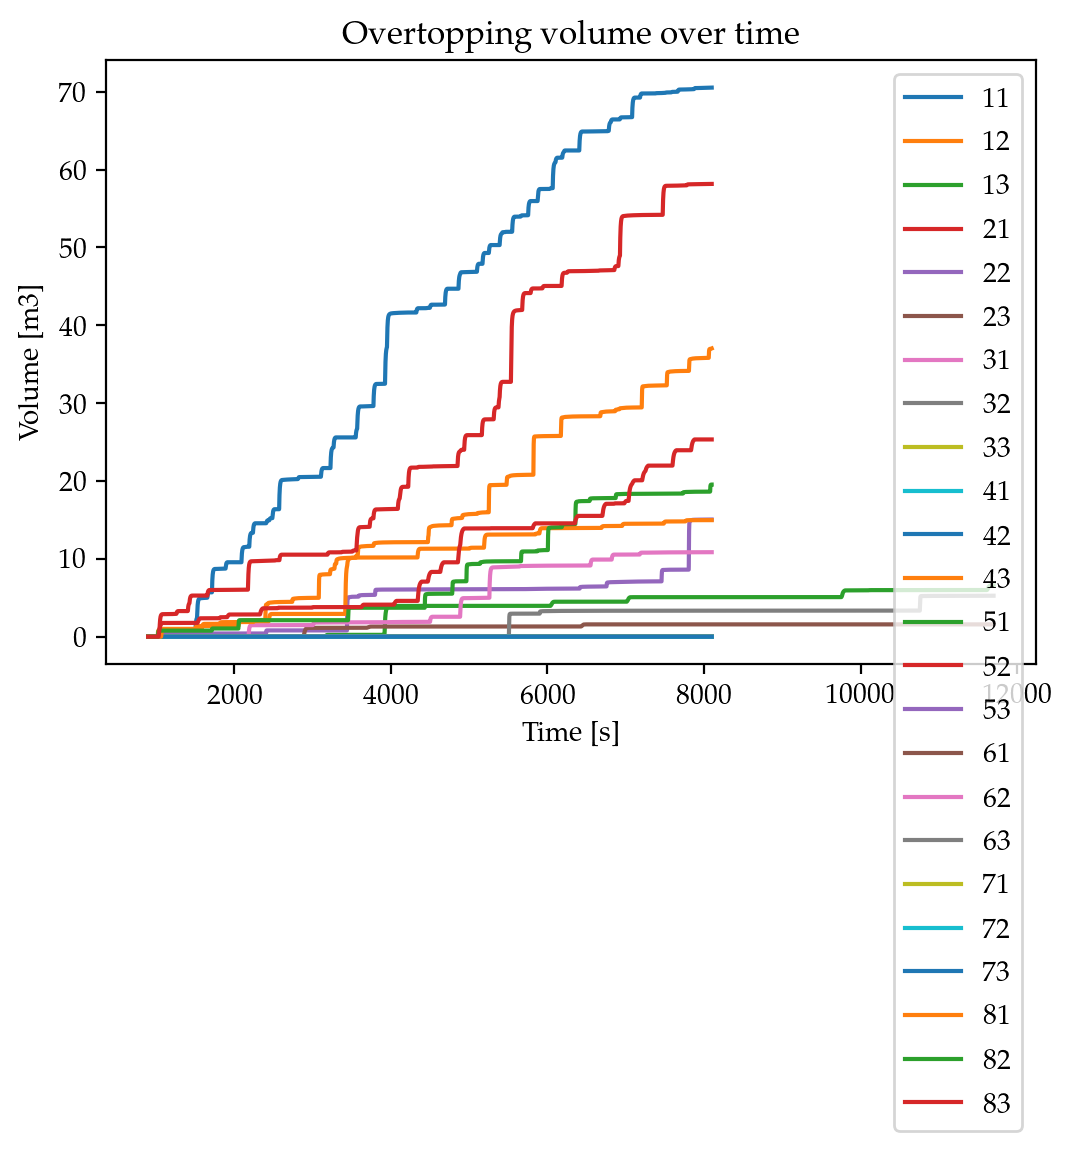

In [3]:
q_rates = np.zeros([8,3])
q_max = np.zeros([8,3])
i_ratios = np.array([[0.3848,0.3923,0.4320,0.5003,0.5941,0.0000,0.0000,0.4563],[0.6528,0.6538,0.6635,0.6739,0.6809,0.0014,0.0000,2.0745]])

for k in range(8):
    for i in range(3):
        project_name = "Scenario_"+str(k+1)
        file_name = "Q_01_loc"+str(i+1)+".tbl"
        work_path = "../../../Schenarios/"+project_name+"/SWASH/Output/"+file_name
        if (k==7):
            work_path = "../../../Schenarios/"+project_name+"_alt/SWASH/Output/"+file_name
        
        head = (pd.read_csv(work_path, sep='\s+',skiprows=4)).columns[1:]
        df = pd.read_csv(work_path, sep='\s+',skiprows=7, names= head)

        Tsec = np.array(df.Tsec,dtype=float)
        Qmag = np.array(df.Qmag,dtype=float)
        Qdir = np.array(df.Qdir,dtype=float)

        Qmag_acc = np.zeros(len(Qmag)-1)
        Qmag_a = 0
        for j in range(len(Qmag)-1):
            if(Qdir[j] == 0):
                Qmag_a += Qmag[j] * (Tsec[j+1] - Tsec[j])
            if(Qdir[j] == 180):
#                 print("Warning: Negative flow encountered at scenario "+str(k+1)+", loc "+str(i+1)+", step "+str(j))
                Qmag_a -= Qmag[j] * (Tsec[j+1] - Tsec[j])
            Qmag_acc[j] = Qmag_a
        plt.plot(Tsec[:-1], Qmag_acc,label=str(k+1)+str(i+1))
        q_rates[k,i] = np.mean(Qmag)*1000
#         q_max[k,i] = np.max(Qmag)*1000
        if(np.sum(Qmag)>0):
            Qmag = Qmag[Qmag!=0]
            q_max[k,i] = np.percentile(Qmag,97.725)*1000
#         print(k,i,len(Qmag_acc))
plt.legend()
plt.title('Overtopping volume over time')
plt.ylabel('Volume [m3]')
plt.xlabel('Time [s]')
# np.savetxt('../../Overtopping results/q_num.txt',q_rates)
q_rates,(),q_max

q_i = np.zeros([8,2])
q_i[:,0] = q_rates[:,1]*i_ratios[0]
q_i[:,1] = q_rates[:,1]*i_ratios[1]
np.savetxt('../../Overtopping results/q_num_i.txt',q_i)

In [19]:
project_name = "Scenario_1"
file_name = "Q_01_loc"+str(1)+".tbl"
work_path = "../../../New folder/"+project_name+"/SWASH/Output/"+file_name

head = (pd.read_csv(work_path, sep='\s+',skiprows=4)).columns[1:]
df = pd.read_csv(work_path, sep='\s+',skiprows=7, names= head)

Tsec = np.array(df.Tsec,dtype=float)
Qmag = np.array(df.Qmag,dtype=float)
Qdir = np.array(df.Qdir,dtype=float)

Qmag_acc = np.zeros(len(Qmag)-1)
Qmag_a = 0

for j in range(len(Qmag)-1):
    if(Qdir[j] == 0):
        Qmag_a += Qmag[j] * (Tsec[j+1] - Tsec[j])
    if(Qdir[j] == 180):
        print("Warning: Negative flow encountered at step"+str(j))
        Qmag_a -= Qmag[j] * (Tsec[j+1] - Tsec[j])
    Qmag_acc[j] = Qmag_a
plt.plot(Tsec[:-1], Qmag_acc)

FileNotFoundError: [Errno 2] File b'../../../New folder/Scenario_1/SWASH/Output/Q_01_loc1.tbl' does not exist: b'../../../New folder/Scenario_1/SWASH/Output/Q_01_loc1.tbl'

No handles with labels found to put in legend.


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

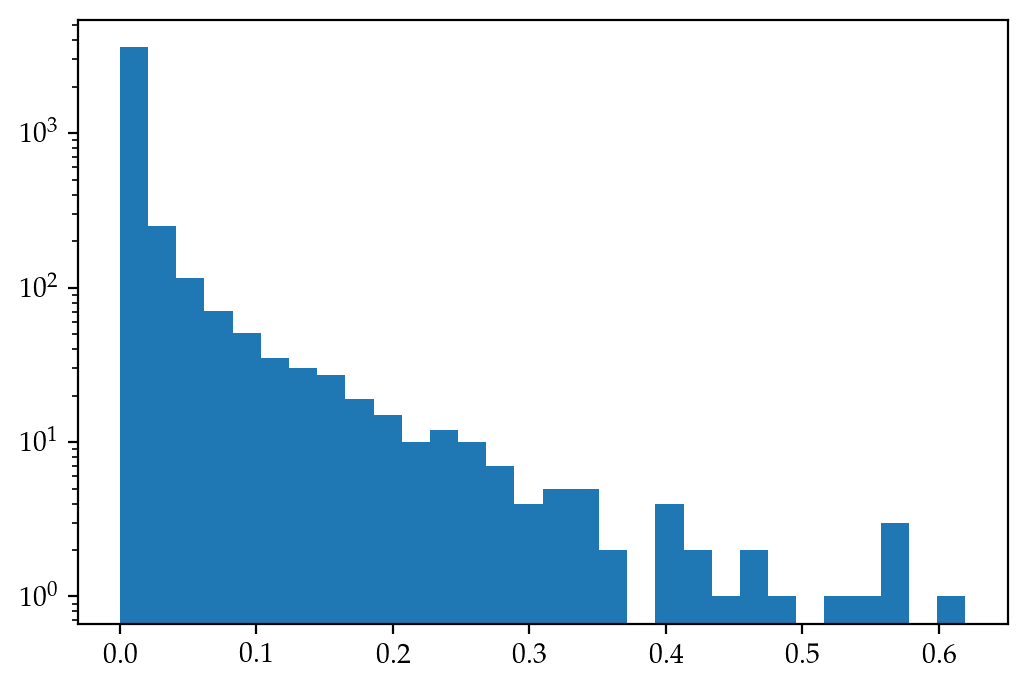

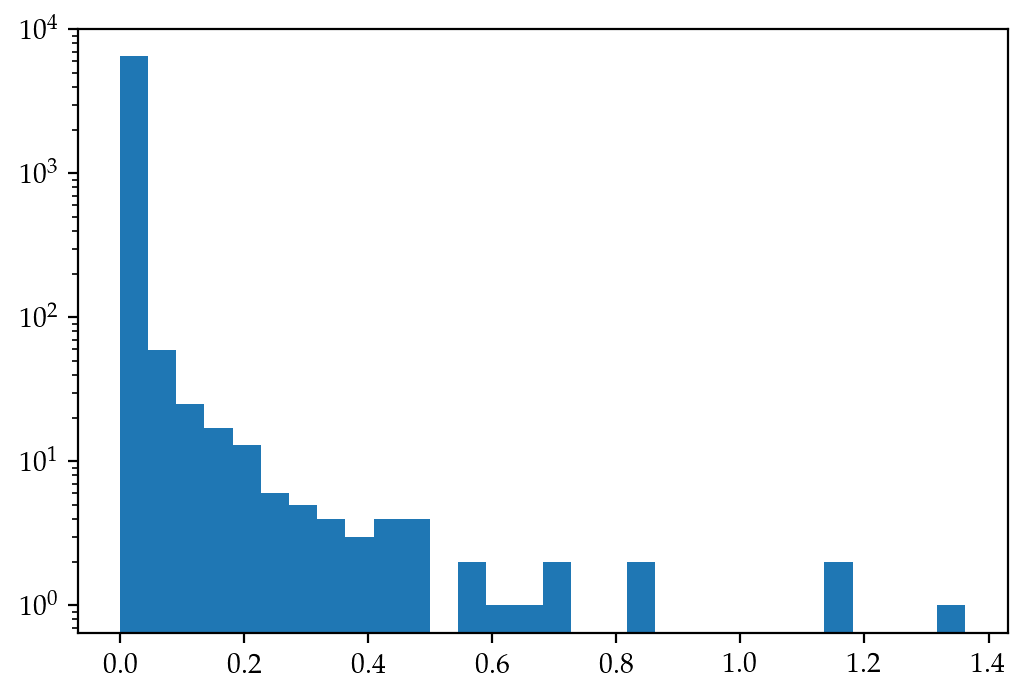

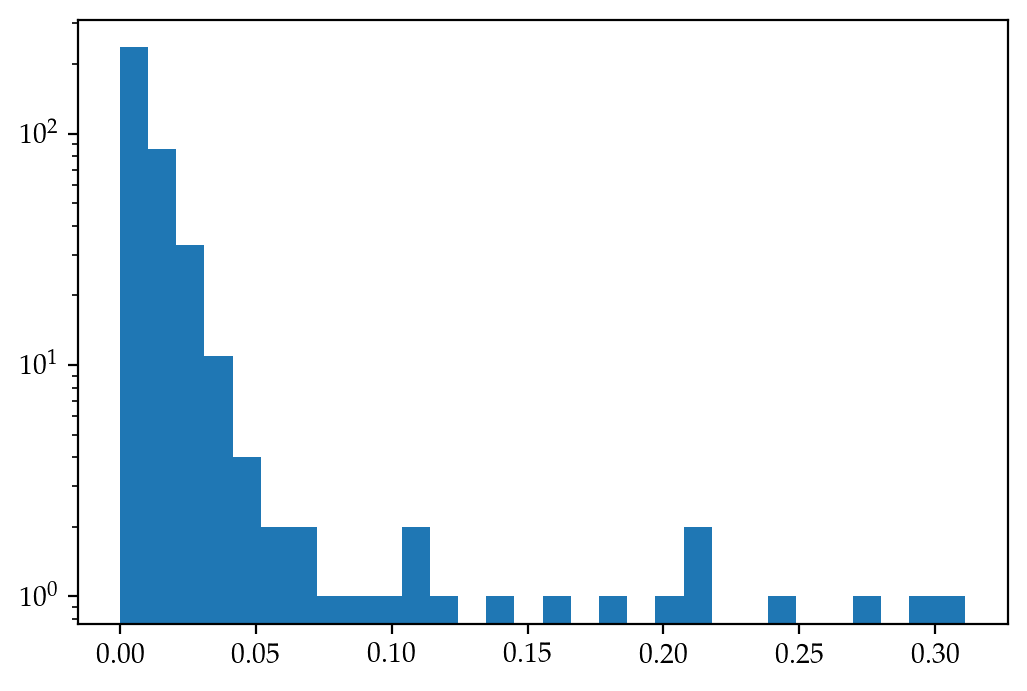

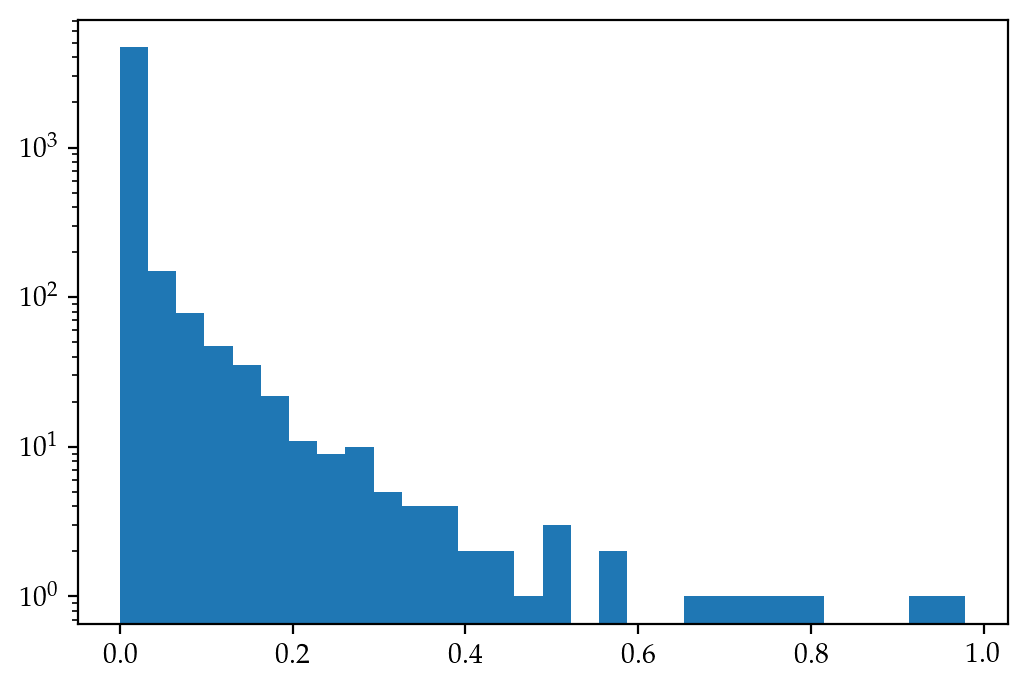

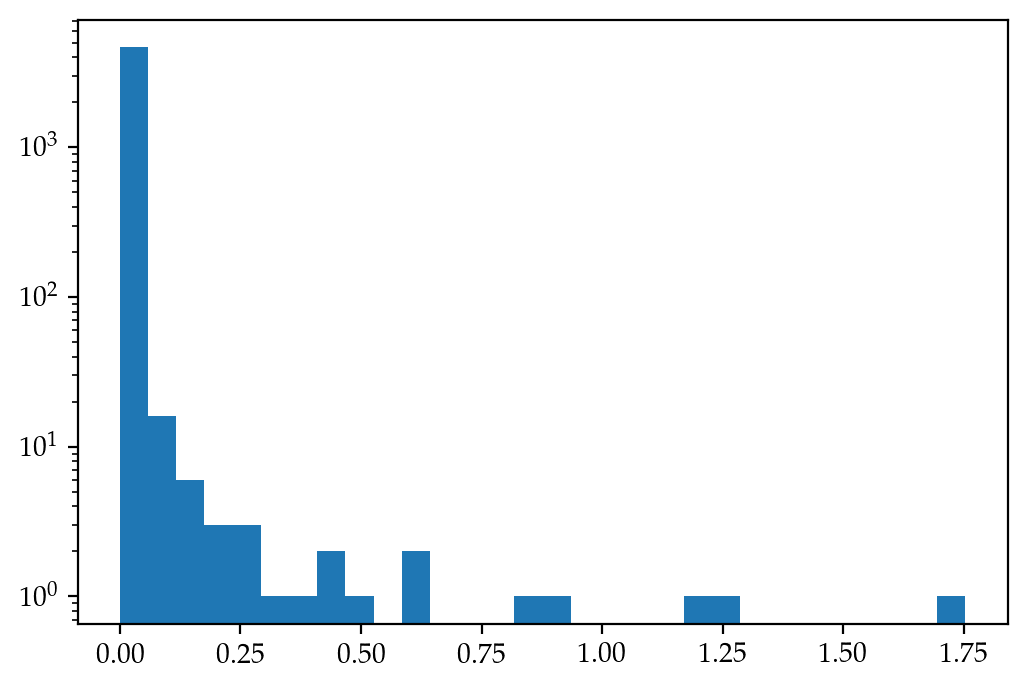

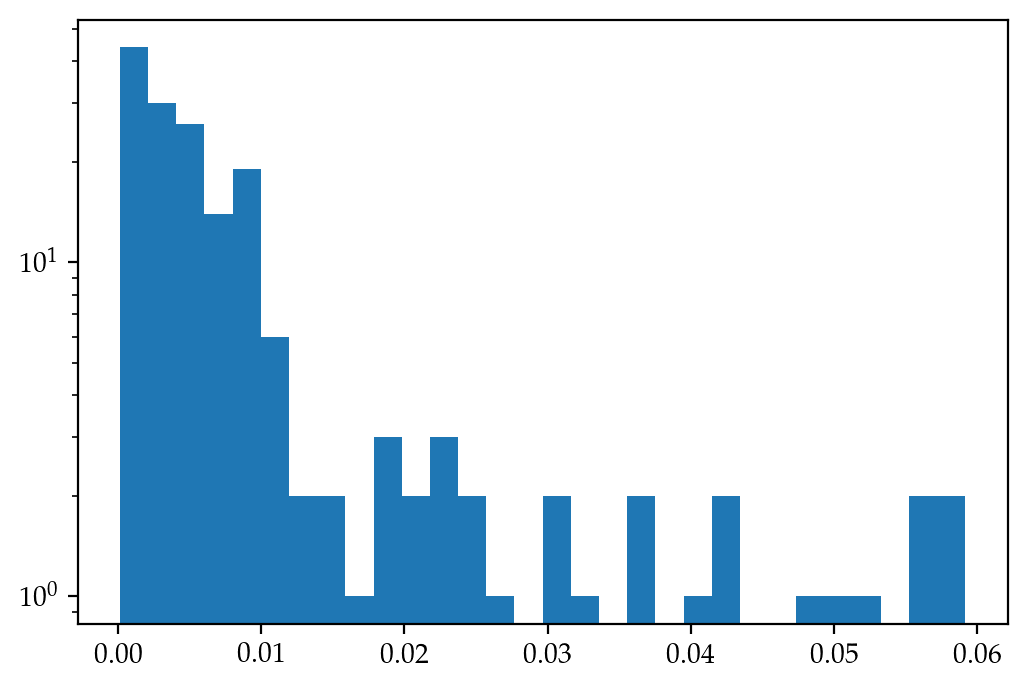

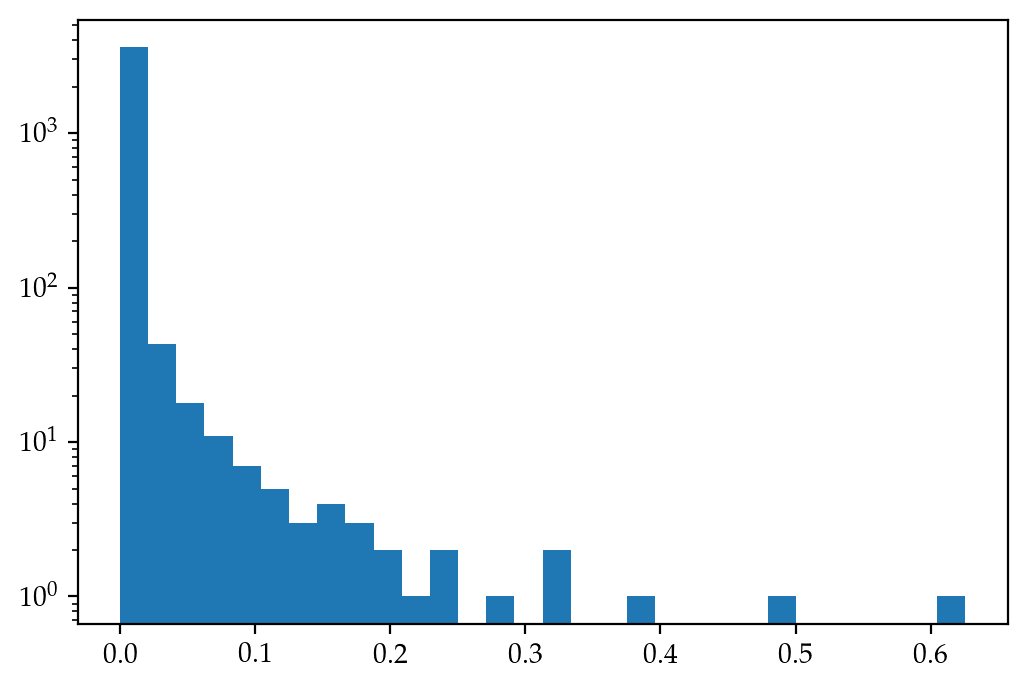

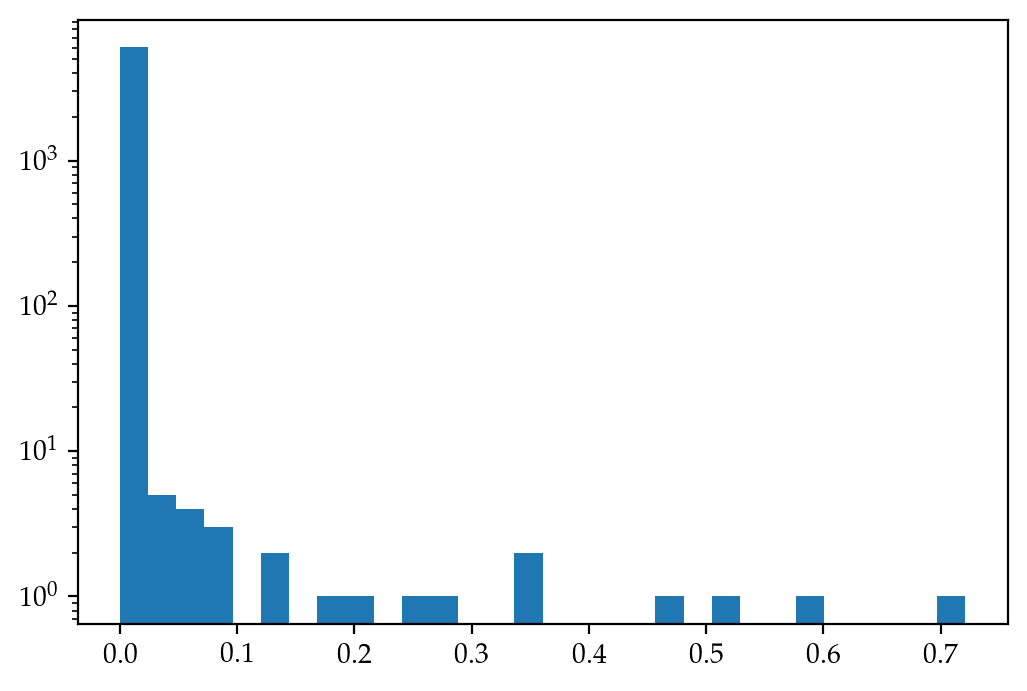

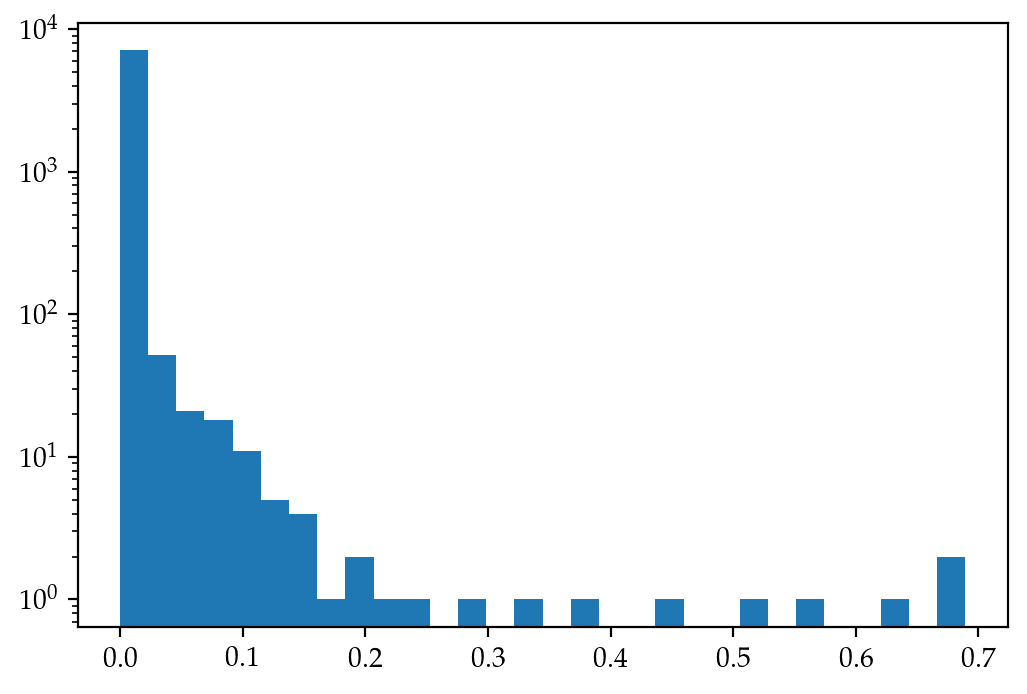

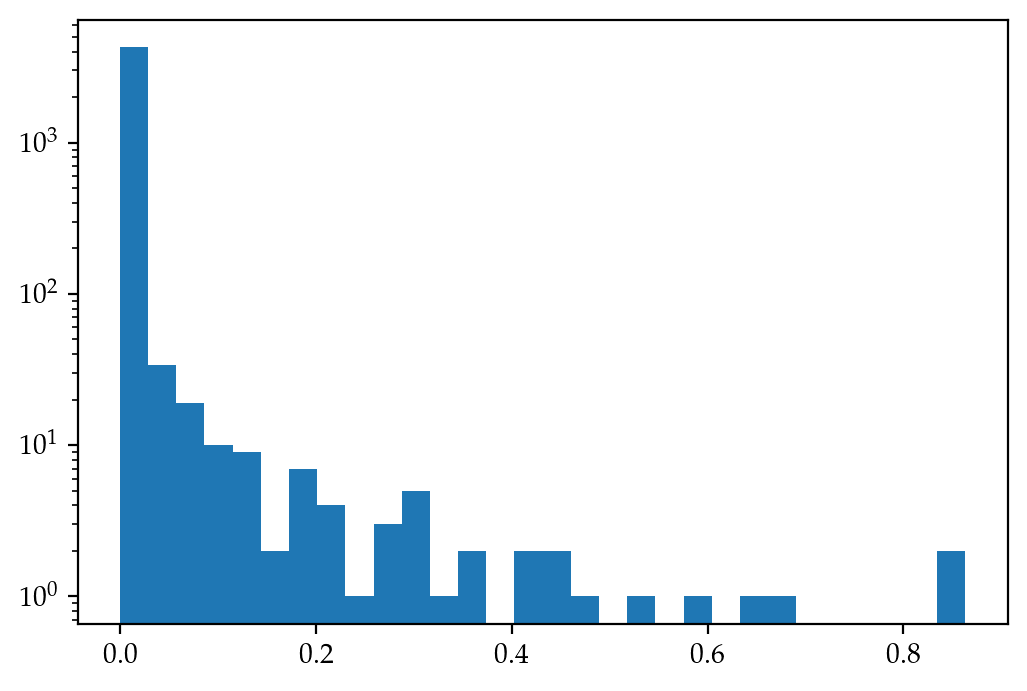

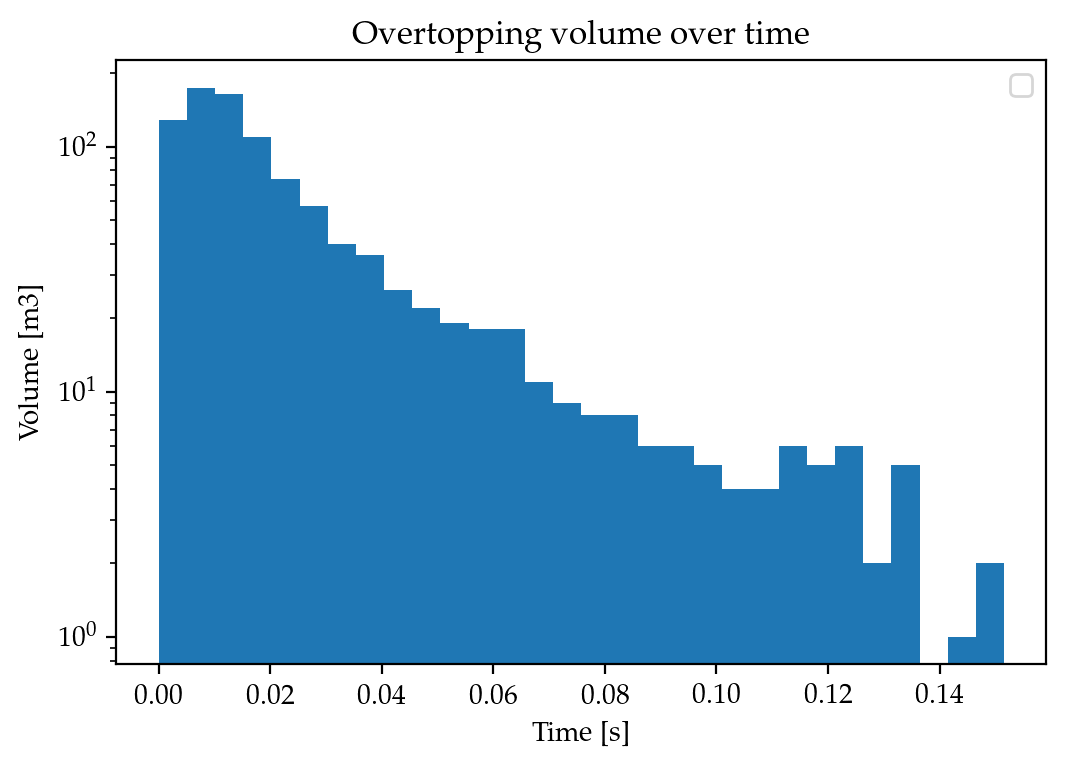

In [43]:



q_rates = np.zeros([8,3])

for k in range(8):
    for i in range(3):
        project_name = "Scenario_"+str(k+1)
        file_name = "Q_01_loc"+str(i+1)+".tbl"
        work_path = "../../../Schenarios/"+project_name+"/SWASH/Output/"+file_name
        if (k==7):
            work_path = "../../../Schenarios/"+project_name+"_alt/SWASH/Output/"+file_name
        
        head = (pd.read_csv(work_path, sep='\s+',skiprows=4)).columns[1:]
        df = pd.read_csv(work_path, sep='\s+',skiprows=7, names= head)

        Tsec = np.array(df.Tsec,dtype=float)
        Qmag = np.array(df.Qmag,dtype=float)
        Qmag[Qmag==0] = np.nan
        if (sum(np.invert(np.isnan(Qmag)))!=0):
            plt.figure()
            plt.hist(Qmag,bins=30,log=True)
#         print(k,i,len(Qmag_acc))
plt.legend()
plt.title('Overtopping volume over time')
plt.ylabel('Volume [m3]')
plt.xlabel('Time [s]')
np.savetxt('../../Overtopping results/q_num.txt',q_rates)
q_rates